In [1]:
import os
import random
import h5py
import math
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import cardiax
import deepx
from deepx import generate

In [2]:
SEED = 0
CELL_PARAMETERS = cardiax.params.PARAMSET_3  # change the parameter set here  (params, dot, should give you intellisense for the options)
SHAPE=(32, 32)  # in adimensional units: (cm) = (units) * dx
START=0  # in adimensional units: (ms) =  (timesteps) * dx
STOP=100_000  # in adimensional units: (ms) =  (timesteps) * dx
CHECKPOINT_EVERY=5000  # in adimensional units: (ms) = (timesteps) * dx
dt=0.01
dx=0.1
INTEGRATOR = cardiax.solve.TimeIntegrator.HEUN

# for random sequences to save on disk
N_STIMULI=3 
N_SCARS=3
FILENAME = "data/test.hdf5"
RESHAPE=(32, 32)  # in adimensional units: (ms) =  (timesteps) / dx
SAVE_INTERVAL_ms=1

In [3]:
initial_state = cardiax.solve.init(SHAPE)

def check(seed):
    rng = jax.random.PRNGKey(seed)

    # generate random conductivity map
    diffusivity = generate.random_diffusivity(rng, SHAPE)

    # generate random stimuli
    protocol_1 = generate.random_protocol(rng, min_start=0, max_start=0)
    protocol_2 = generate.random_protocol(rng, min_start=40_000, max_start=40_000)
    stimuli = [
            generate.random_rectangular_stimulus(rng, SHAPE, protocol_1, modulus=20.0),
            generate.random_triangular_stimulus(rng, SHAPE, protocol_2, modulus=20.0)
    ]

    fig, ax = cardiax.plot.plot_stimuli(stimuli)
    fig.suptitle("Stimuli")
    fig, ax = cardiax.plot.plot_diffusivity(diffusivity)
    fig.suptitle("Diffusivity")
    plt.show()
    return


def main(seed):
    rng = jax.random.PRNGKey(seed)

    # generate random conductivity map
    diffusivity=generate.random_diffusivity(rng, SHAPE)

    # generate random stimuli
    protocol_1 = generate.random_protocol(rng, min_start=0, max_start=0)
    protocol_2 = generate.random_protocol(rng, min_start=40_000, max_start=40_000)
    stimuli = [
            generate.random_rectangular_stimulus(rng, SHAPE, protocol_1, modulus=20.0),
            generate.random_triangular_stimulus(rng, SHAPE, protocol_2, modulus=20.0)
    ]
    
    checkpoint_states = cardiax.solve.forward(
        initial_state,
        # jnp.arange(START, STOP, CHECKPOINT_EVERY),
        jnp.arange(0, 5000, 100),
        CELL_PARAMETERS,
        diffusivity, 
        stimuli,
        dt,
        dx,
        plot_while=True,
        integrator=INTEGRATOR,
    )
    return checkpoint_states

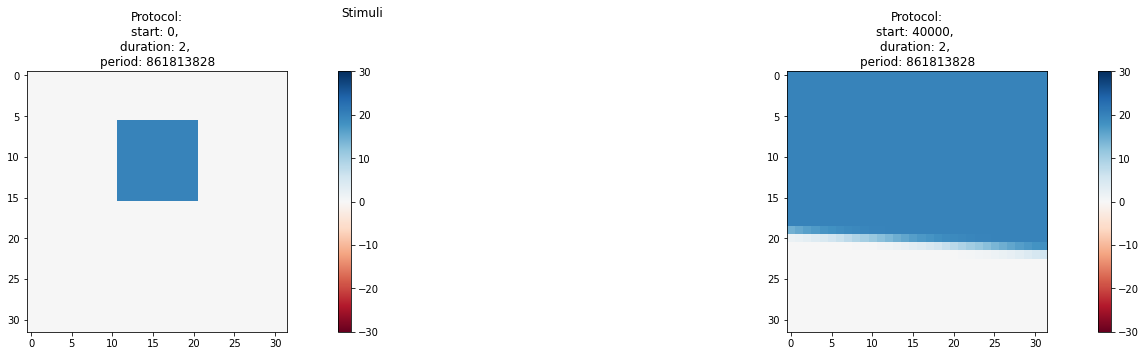

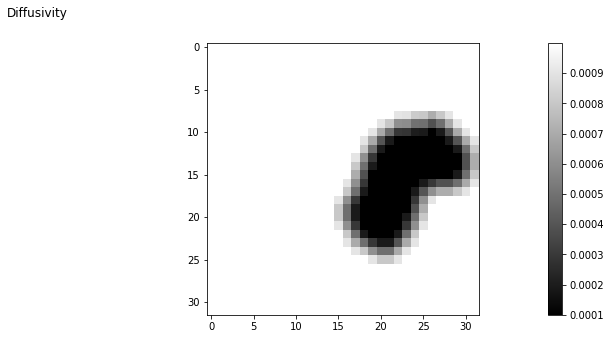

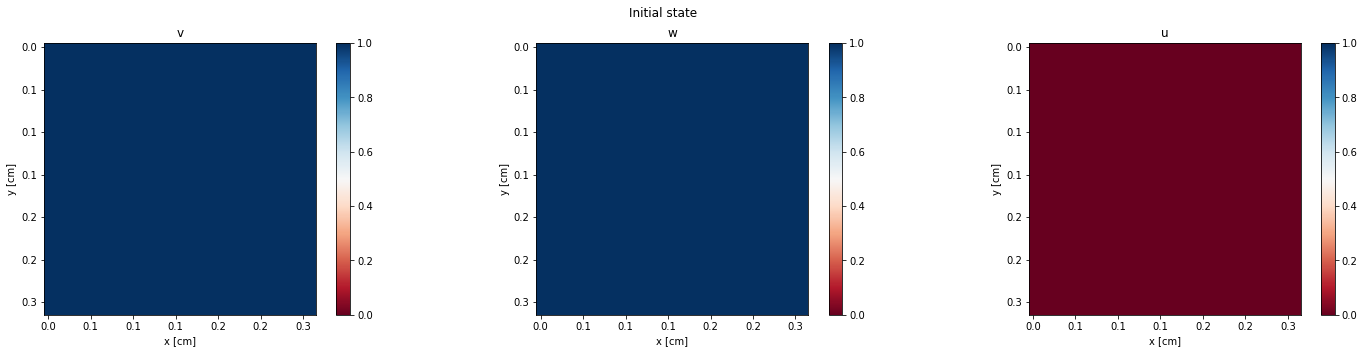

State(v=Traced<ShapedArray(float32[32,32])>with<DynamicJaxprTrace(level=1/1)>, w=Traced<ShapedArray(float32[32,32])>with<DynamicJaxprTrace(level=1/1)>, u=Traced<ShapedArray(float32[32,32])>with<DynamicJaxprTrace(level=1/1)>) 


 State(v=Traced<ShapedArray(float32[32,32])>with<DynamicJaxprTrace(level=1/1)>, w=Traced<ShapedArray(float32[32,32])>with<DynamicJaxprTrace(level=1/1)>, u=Traced<ShapedArray(float32[32,32])>with<DynamicJaxprTrace(level=1/1)>) 


 Traced<ShapedArray(float32[], weak_type=True)>with<DynamicJaxprTrace(level=0/1)>
State(v=Traced<ShapedArray(float32[32,32])>with<DynamicJaxprTrace(level=1/1)>, w=Traced<ShapedArray(float32[32,32])>with<DynamicJaxprTrace(level=1/1)>, u=Traced<ShapedArray(float32[32,32])>with<DynamicJaxprTrace(level=1/1)>) 


 (Traced<ShapedArray(float32[32,32])>with<DynamicJaxprTrace(level=1/1)>, Traced<ShapedArray(float32[32,32])>with<DynamicJaxprTrace(level=1/1)>, Traced<ShapedArray(float32[32,32])>with<DynamicJaxprTrace(level=1/1)>, Traced<ShapedArray

ValueError: Expected named tuple, got (Traced<ShapedArray(float32[32,32])>with<DynamicJaxprTrace(level=1/1)>, Traced<ShapedArray(float32[32,32])>with<DynamicJaxprTrace(level=1/1)>, Traced<ShapedArray(float32[32,32])>with<DynamicJaxprTrace(level=1/1)>, Traced<ShapedArray(float32[32,32])>with<DynamicJaxprTrace(level=1/1)>, Traced<ShapedArray(float32[32,32])>with<DynamicJaxprTrace(level=1/1)>, Traced<ShapedArray(float32[32,32])>with<DynamicJaxprTrace(level=1/1)>).

In [4]:
for seed in range(10):
    main(seed)